In [7]:
import numpy as np
import pandas as pd
import requests as rqst
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [8]:
words = open('names.txt').read().splitlines()

In [9]:
words[1:20]

['olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett']

In [10]:
chars = sorted(list(set("".join(words))))
print(len(chars))
chars

26


['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [11]:
chars = sorted(list(set("".join(words))))
print(len(chars))
char_to_i = {char:i + 1 for i, char in enumerate(chars)} # look-up table for mapping char to its respective index
i_to_char = {i + 1:char for i, char in enumerate(chars)} # look-up table for mapping index to its respective char
char_to_i['.'] = 0
i_to_char[0] = '.'
char_to_i

26


{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [12]:
# create a trainign set
xs, ys = [], []
for w in words[:1]:
    print(words[0])
    chrs = ['.'] + list (w) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        print(f"char1: {ch1} and char2: {ch2}")
        ix1 = char_to_i[ch1]
        ix2 = char_to_i[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

emma
char1: . and char2: e
char1: e and char2: m
char1: m and char2: m
char1: m and char2: a
char1: a and char2: .


In [13]:
xs

tensor([ 0,  5, 13, 13,  1])

In [14]:
ys

tensor([ 5, 13, 13,  1,  0])

look at the input and output. what we want is each time the input from the index to get the output from the a similar index. ex: if we give xs[0], we should get ys[0]


## The issue with that approach is that we are going to use gradient descent, and it is not going to work well. so we are going to use one-hot encoding


In [15]:
xenc = F.one_hot(xs, num_classes=27)
xenc.shape

torch.Size([5, 27])

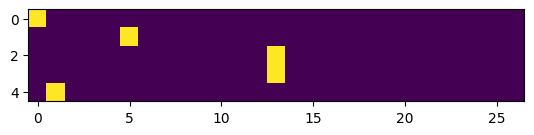

In [16]:
plt.imshow(xenc)

## Always check the data type. we want the input to be floating points


In [17]:
xenc.dtype

torch.int64

In [18]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc.dtype

torch.float32

# Let's build our first Neural Network


In [19]:
W = torch.randn(27, 1) # our first single neuron

xenc @ W

tensor([[ 0.1767],
        [-1.1090],
        [-1.7885],
        [-1.7885],
        [ 1.0068]])

In [20]:
W = torch.randn(27, 27) # now we want to do 27 neurons. this is one layer with 27 neurons
xenc @ W

tensor([[ 1.3238, -1.2226, -0.9824,  0.5569,  0.7953, -0.6206,  2.1135, -0.1069,
         -0.0091,  0.4126,  0.6255, -0.9672, -1.2209, -0.8899, -1.6296, -0.3130,
         -0.8114,  0.6547,  0.6757,  1.2380, -0.6824, -1.5186, -1.1815,  3.1385,
          0.6952, -1.0939, -0.6105],
        [-0.6955, -0.0756, -0.6050,  1.4890, -0.7697,  1.6652,  0.2490,  0.3804,
          0.1246, -0.9913,  0.0527,  0.3999,  0.3199, -0.8025,  1.1395, -0.6195,
         -0.7696,  0.0069,  2.2055,  0.0436, -0.9435, -0.3426,  0.6122,  0.5062,
         -0.4940, -0.0923,  0.4019],
        [-0.3864,  1.6869, -1.8885,  1.3520,  1.0739, -1.0152,  0.0559,  0.6701,
          0.6500, -1.0715, -0.7279, -0.5315,  0.7498,  1.1094,  0.2667, -0.0936,
          0.7612,  2.3447,  0.9666,  1.1950, -0.5455,  1.0239,  0.3273,  1.3278,
          0.2568,  0.2832, -1.1392],
        [-0.3864,  1.6869, -1.8885,  1.3520,  1.0739, -1.0152,  0.0559,  0.6701,
          0.6500, -1.0715, -0.7279, -0.5315,  0.7498,  1.1094,  0.2667, -0.0936

In [21]:
logits = (xenc @ W) # log-count
counts = logits.exp() # equivalent of N in Bigrams
probs = counts/ counts.sum()
probs

tensor([[0.0145, 0.0011, 0.0014, 0.0067, 0.0085, 0.0021, 0.0319, 0.0035, 0.0038,
         0.0058, 0.0072, 0.0015, 0.0011, 0.0016, 0.0008, 0.0028, 0.0017, 0.0074,
         0.0076, 0.0133, 0.0019, 0.0008, 0.0012, 0.0889, 0.0077, 0.0013, 0.0021],
        [0.0019, 0.0036, 0.0021, 0.0171, 0.0018, 0.0204, 0.0049, 0.0056, 0.0044,
         0.0014, 0.0041, 0.0057, 0.0053, 0.0017, 0.0120, 0.0021, 0.0018, 0.0039,
         0.0350, 0.0040, 0.0015, 0.0027, 0.0071, 0.0064, 0.0024, 0.0035, 0.0058],
        [0.0026, 0.0208, 0.0006, 0.0149, 0.0113, 0.0014, 0.0041, 0.0075, 0.0074,
         0.0013, 0.0019, 0.0023, 0.0082, 0.0117, 0.0050, 0.0035, 0.0082, 0.0402,
         0.0101, 0.0127, 0.0022, 0.0107, 0.0053, 0.0145, 0.0050, 0.0051, 0.0012],
        [0.0026, 0.0208, 0.0006, 0.0149, 0.0113, 0.0014, 0.0041, 0.0075, 0.0074,
         0.0013, 0.0019, 0.0023, 0.0082, 0.0117, 0.0050, 0.0035, 0.0082, 0.0402,
         0.0101, 0.0127, 0.0022, 0.0107, 0.0053, 0.0145, 0.0050, 0.0051, 0.0012],
        [0.0046, 0.0103,

In [22]:
ys

tensor([ 5, 13, 13,  1,  0])

In [23]:
xs

tensor([ 0,  5, 13, 13,  1])

In [24]:
g = torch.Generator().manual_seed(2147483647) # using seed to ensure replicability
W = torch.randn((27,27), generator=g)


In [25]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = (xenc @ W) # log-count
counts = logits.exp() # equivalent of N in Bigrams
probs = counts/ counts.sum() # probability for the next character ( the two consecutive lines are sofmax)
probs

tensor([[0.0195, 0.0032, 0.0039, 0.0014, 0.0054, 0.0039, 0.0009, 0.0074, 0.0044,
         0.0100, 0.0025, 0.0089, 0.0029, 0.0026, 0.0160, 0.0763, 0.0194, 0.0008,
         0.0080, 0.0018, 0.0109, 0.0035, 0.0009, 0.0064, 0.0038, 0.0493, 0.0468],
        [0.0065, 0.0179, 0.0056, 0.0117, 0.0447, 0.0065, 0.0021, 0.0075, 0.0022,
         0.0068, 0.0158, 0.0051, 0.0026, 0.0041, 0.0024, 0.0071, 0.0065, 0.0010,
         0.0206, 0.0048, 0.0109, 0.0067, 0.0113, 0.0006, 0.0026, 0.0005, 0.0106],
        [0.0049, 0.0116, 0.0077, 0.0053, 0.0106, 0.0032, 0.0042, 0.0039, 0.0194,
         0.0026, 0.0012, 0.0125, 0.0021, 0.0042, 0.0023, 0.0018, 0.0092, 0.0019,
         0.0103, 0.0009, 0.0033, 0.0012, 0.0021, 0.0032, 0.0190, 0.0074, 0.0020],
        [0.0049, 0.0116, 0.0077, 0.0053, 0.0106, 0.0032, 0.0042, 0.0039, 0.0194,
         0.0026, 0.0012, 0.0125, 0.0021, 0.0042, 0.0023, 0.0018, 0.0092, 0.0019,
         0.0103, 0.0009, 0.0033, 0.0012, 0.0021, 0.0032, 0.0190, 0.0074, 0.0020],
        [0.0021, 0.0012,

In [26]:
probs.shape

torch.Size([5, 27])

In [27]:
nlls = torch.zeros(8)
for i in range(5):
    #i-th bigram
    x =xs[i].item()
    y = ys[i].item()
    print('===========================')
    print(f"\n bigram example {i + 1 }:{i_to_char[x]} {i_to_char[y]} (indeces {x}, {y})")
    print(f"\n input to the neural network is: {x}")
    print(f"\n output probabilities from  the neural network is: {probs[i]}")
    print(f"\n lebel ( actual next character) is : {y}")
    p = probs[i,y]
    print(f"\n probability assigned to the correct next char by the net is: {p.item()}")
    logp = torch.log(p)
    print(f"\n log likelihood is: {logp.item()}")
    nll = -logp
    print(f"\n negative log likelihood: {nll.item()}")
    nlls[i] = nll
print("====================================")
print(f"\n the avarage log likelihood, i.e loss = {nlls.mean().item()}")


 bigram example 1:. e (indeces 0, 5)

 input to the neural network is: 0

 output probabilities from  the neural network is: tensor([0.0195, 0.0032, 0.0039, 0.0014, 0.0054, 0.0039, 0.0009, 0.0074, 0.0044,
        0.0100, 0.0025, 0.0089, 0.0029, 0.0026, 0.0160, 0.0763, 0.0194, 0.0008,
        0.0080, 0.0018, 0.0109, 0.0035, 0.0009, 0.0064, 0.0038, 0.0493, 0.0468])

 lebel ( actual next character) is : 5

 probability assigned to the correct next char by the net is: 0.003941063769161701

 log likelihood is: -5.536304473876953

 negative log likelihood: 5.536304473876953

 bigram example 2:e m (indeces 5, 13)

 input to the neural network is: 5

 output probabilities from  the neural network is: tensor([0.0065, 0.0179, 0.0056, 0.0117, 0.0447, 0.0065, 0.0021, 0.0075, 0.0022,
        0.0068, 0.0158, 0.0051, 0.0026, 0.0041, 0.0024, 0.0071, 0.0065, 0.0010,
        0.0206, 0.0048, 0.0109, 0.0067, 0.0113, 0.0006, 0.0026, 0.0005, 0.0106])

 lebel ( actual next character) is : 13

 probability a

In [42]:
g = torch.Generator().manual_seed(2147483647) # using seed to ensure replicability
W = torch.randn((27,27), generator=g, requires_grad=True)


In [29]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = (xenc @ W) # log-count
counts = logits.exp() # equivalent of N in Bigrams
probs = counts/ counts.sum() # probability for the next character ( the two consecutive lines are sofmax)
probs

tensor([[0.0195, 0.0032, 0.0039, 0.0014, 0.0054, 0.0039, 0.0009, 0.0074, 0.0044,
         0.0100, 0.0025, 0.0089, 0.0029, 0.0026, 0.0160, 0.0763, 0.0194, 0.0008,
         0.0080, 0.0018, 0.0109, 0.0035, 0.0009, 0.0064, 0.0038, 0.0493, 0.0468],
        [0.0065, 0.0179, 0.0056, 0.0117, 0.0447, 0.0065, 0.0021, 0.0075, 0.0022,
         0.0068, 0.0158, 0.0051, 0.0026, 0.0041, 0.0024, 0.0071, 0.0065, 0.0010,
         0.0206, 0.0048, 0.0109, 0.0067, 0.0113, 0.0006, 0.0026, 0.0005, 0.0106],
        [0.0049, 0.0116, 0.0077, 0.0053, 0.0106, 0.0032, 0.0042, 0.0039, 0.0194,
         0.0026, 0.0012, 0.0125, 0.0021, 0.0042, 0.0023, 0.0018, 0.0092, 0.0019,
         0.0103, 0.0009, 0.0033, 0.0012, 0.0021, 0.0032, 0.0190, 0.0074, 0.0020],
        [0.0049, 0.0116, 0.0077, 0.0053, 0.0106, 0.0032, 0.0042, 0.0039, 0.0194,
         0.0026, 0.0012, 0.0125, 0.0021, 0.0042, 0.0023, 0.0018, 0.0092, 0.0019,
         0.0103, 0.0009, 0.0033, 0.0012, 0.0021, 0.0032, 0.0190, 0.0074, 0.0020],
        [0.0021, 0.0012,

In [30]:
ys

tensor([ 5, 13, 13,  1,  0])

In [31]:
# since it is one-hot encoded, we are interested in probabilities at the given index

probs[0,5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4,0]

(tensor(0.0039, grad_fn=<SelectBackward0>),
 tensor(0.0041, grad_fn=<SelectBackward0>),
 tensor(0.0042, grad_fn=<SelectBackward0>),
 tensor(0.0116, grad_fn=<SelectBackward0>),
 tensor(0.0021, grad_fn=<SelectBackward0>))

In [32]:
# getting the probabilites with pytorch using the torch.arage fonction

print(torch.arange(5))

probs[torch.arange(5), ys]

tensor([0, 1, 2, 3, 4])


tensor([0.0039, 0.0041, 0.0042, 0.0116, 0.0021], grad_fn=<IndexBackward0>)

In [33]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(5.4286, grad_fn=<NegBackward0>)

In [34]:
W.grad=None
loss.backward()

In [35]:
print(f" shape is {W.grad.shape}")
W.grad

 shape is torch.Size([27, 27])


tensor([[ 0.0195,  0.0032,  0.0039,  0.0014,  0.0054, -0.1961,  0.0009,  0.0074,
          0.0044,  0.0100,  0.0025,  0.0089,  0.0029,  0.0026,  0.0160,  0.0763,
          0.0194,  0.0008,  0.0080,  0.0018,  0.0109,  0.0035,  0.0009,  0.0064,
          0.0038,  0.0493,  0.0468],
        [-0.1979,  0.0012,  0.0055,  0.0014,  0.0084,  0.0043,  0.0150,  0.0018,
          0.0017,  0.0007,  0.0142,  0.0012,  0.0137,  0.0015,  0.0032,  0.0029,
          0.0057,  0.0011,  0.0125,  0.0074,  0.0064,  0.0043,  0.0007,  0.0046,
          0.0091,  0.0070,  0.0013],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [36]:
#update the tensor
W.data += -0.1 * W.grad

In [48]:
# create a trainign set
xs, ys = [], []
for w in words:
    chrs = ['.'] + list (w) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        #print(f"char1: {ch1} and char2: {ch2}")
        ix1 = char_to_i[ch1]
        ix2 = char_to_i[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f"number of examples: {num}")
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

number of examples: 228146


In [49]:
# putting everything together now

for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = (xenc @ W) # log-count
    counts = logits.exp() # equivalent of N in Bigrams
    probs = counts/ counts.sum(1, keepdim=True) # probability for the next character ( the two consecutive lines are sofmax)
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())

    #backward pass
    W.grad = None
    loss.backward()

    #update
    W.data += -50 * W.grad

3.758953332901001
3.3710989952087402
3.1540420055389404
3.020373582839966
2.9277119636535645
2.8604023456573486
2.8097293376922607
2.7701027393341064
2.7380733489990234
2.711496591567993
2.6890034675598145
2.6696884632110596
2.6529300212860107
2.638277292251587
2.6253881454467773
2.613990545272827
2.603863477706909
2.5948219299316406
2.5867116451263428
2.57940411567688
2.572789192199707
2.5667762756347656
2.5612878799438477
2.5562589168548584
2.551633596420288
2.547366142272949
2.5434155464172363
2.5397486686706543
2.536336660385132
2.533154249191284
2.5301806926727295
2.5273969173431396
2.5247864723205566
2.522334575653076
2.520029067993164
2.517857789993286
2.515810966491699
2.513878345489502
2.512052059173584
2.510324001312256
2.5086867809295654
2.5071346759796143
2.5056614875793457
2.5042612552642822
2.502929210662842
2.5016613006591797
2.5004520416259766
2.4992990493774414
2.498197317123413
2.497144937515259
2.496137857437134
2.495173692703247
2.4942495822906494
2.49336314201355
2

In [ ]:
# The equivalent of smoothing in the gradient base learning
# if all we initialize all the W to zero, W = torch.randn(), then logits will be zero and their expo will be all one, and the probabilities will be uniform. so avoid equal or zero
# trying to incentifize W to be zero will achive better



#Regularization

In [45]:
# create a trainign set for regularized neuron
xs, ys = [], []
for w in words:
    chrs = ['.'] + list (w) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        #print(f"char1: {ch1} and char2: {ch2}")
        ix1 = char_to_i[ch1]
        ix2 = char_to_i[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f"number of examples: {num}")
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

number of examples: 228146


In [46]:

# putting everything together now

for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = (xenc @ W) # log-count
    counts = logits.exp() # equivalent of N in Bigrams
    probs = counts/ counts.sum(1, keepdim=True) # probability for the next character ( the two consecutive lines are sofmax)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean() # with regulazation layer
    print(loss.item())

    #backward pass
    W.grad = None
    loss.backward()

    #update
    W.data += -50 * W.grad

3.768618583679199
3.378804922103882
3.1610894203186035
3.027186155319214
2.9344849586486816
2.867231607437134
2.816654920578003
2.777147054672241
2.7452545166015625
2.7188308238983154
2.6965057849884033
2.6773719787597656
2.6608054637908936
2.6463515758514404
2.633664846420288
2.6224710941314697
2.6125476360321045
2.6037065982818604
2.595794439315796
2.5886807441711426
2.5822560787200928
2.5764291286468506
2.5711233615875244
2.566272735595703
2.5618226528167725
2.5577261447906494
2.5539438724517822
2.550442695617676
2.547192335128784
2.5441696643829346
2.5413522720336914
2.538722038269043
2.536261796951294
2.5339579582214355
2.531797409057617
2.5297679901123047
2.527860164642334
2.5260636806488037
2.5243701934814453
2.522773027420044
2.52126407623291
2.519836664199829
2.5184857845306396
2.517205238342285
2.515990734100342
2.5148370265960693
2.5137407779693604
2.51269793510437
2.511704921722412
2.5107579231262207
2.509855031967163
2.5089924335479736
2.5081679821014404
2.507380247116089


In [53]:
# sampling from neural net (borrowing code fro)
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    index = 0
    while True:
        # probs = p[index]  # don't overwrite `p`
        # index = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        # out.append(i_to_char[index])

        #now 
        xenc = F.one_hot(torch.tensor([index]), num_classes=27).float()
        logits = (xenc @ W) # log-count
        counts = logits.exp() # equivalent of N in Bigrams
        p = counts/ counts.sum(1, keepdim=True) # probability for the next character ( the two consecutive lines are sofmax)

        index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(i_to_char[index])
        
        if index == 0:
            break
    print("".join(out))

junide.
janasah.
p.
cfay.
a.
nn.
kohin.
tolian.
juwe.
kilanaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabi.
werimikimaynin.
anaasn.


# The output is the same as the bigram that we used becuase this is the identical model just with different
